## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.groupby(['landing_page', 'group']).count()

user_id  timestamp  converted
landing_page group                                   
new_page     control       1928       1928       1928
             treatment   145311     145311     145311
old_page     control     145274     145274     145274
             treatment     1965       1965       1965

The No of times new_page and treatment dont line up is **'new_page -> control' + 'old_page -> treatment'**

i.e) 1928 + 1965

f. Do any of the rows have missing values?

In [10]:
df.query('landing_page == "new_page"').query('group != "treatment"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 22 to 294331
Data columns (total 5 columns):
user_id         1928 non-null int64
timestamp       1928 non-null object
group           1928 non-null object
landing_page    1928 non-null object
converted       1928 non-null int64
dtypes: int64(2), object(3)
memory usage: 90.4+ KB


No. As seen from df.info(), there are no rows with missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
#We should remove the rows where treatment is not aligned with new_page, or control is not aligned with old_page

df_t1 = df.query('landing_page == "new_page"').query('group == "treatment"')
df_t2 = df.query('landing_page == "old_page"').query('group == "control"')

#Append both the dfs to get the complete one
df2 = df_t1.append(df_t2, ignore_index=True)

In [4]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [5]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [6]:
df2.user_id.count()

290585

In [7]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [8]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [9]:
df2.drop(index=1404, axis=1, inplace=True)
df2.user_id.count()

290584

After removing the duplicate using drop, checking with the count to see, if it matches with the nunique value.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [10]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [11]:
gb = df2.groupby(['group', 'converted']).count()
gb

user_id  timestamp  landing_page
group     converted                                  
control   0           127785     127785        127785
          1            17489      17489         17489
treatment 0           128046     128046        128046
          1            17264      17264         17264

In [12]:
c_conv = gb.loc['control', 1][0]
c_no_conv = gb.loc['control', 0][0]

In [13]:
p = c_conv/(c_conv + c_no_conv)
p

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
t_conv = gb.loc['treatment', 1][0]
t_no_conv = gb.loc['treatment', 0][0]

p = t_conv/(t_conv + t_no_conv)
p

0.11880806551510564

d. What is the probability that an individual received the new page?

In [15]:
gb = df2.groupby('landing_page').count()
gb

,user_id,timestamp,group,converted
landing_page,,,,
new_page,145310,145310,145310,145310
old_page,145274,145274,145274,145274


In [16]:
new_page = gb.loc['new_page'][0]
old_page = gb.loc['old_page'][0]

p = new_page/(new_page + old_page)
p

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, the probability of conversion are almost same whether they belong to 'treatment' group and are shown a new page or, they belong to 'control' group and are shown old page

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**NULL Hypothesis**

Mean conversion rate for new Page is less than or equal to Old Page : 
**$p_{new}$** <= **$p_{old}$**

**Alternative**
Mean conversion rate for new page is higher than old page : 
**$p_{new}$** > **$p_{old}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

## Answers for the quiz


**For NULL Hypothesis**, as per given, p_new and p_old are equal. That means, the difference between them is **0**. And, the observed p_new and p_old from the data shouldn't be used, instead mean of them is what the p_new and p-old becomes as per the assumption,

Hence, 

For first and second question, the answer is mean of observed p_new and p_old

For, the last question, the answer is 0

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

Since, as per Null Hypothesis, there's no difference between conversion rate for old and new pages, they are essentially equal to the overall conversion rate, irrespective of the page.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [19]:
gb_page = df2.groupby(['landing_page']).count()

gb_page

,user_id,timestamp,group,converted
landing_page,,,,
new_page,145310,145310,145310,145310
old_page,145274,145274,145274,145274


In [20]:
n_new = gb_page.loc['new_page'][0]
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = gb_page.loc['old_page'][0]
n_old

145274

In [22]:
# Pnew - P_old

p_diff = p_new - p_old
p_diff

0.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulating conversion rate times for NULL Hypothesis 

new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1 - p_new)])
p_new_sim = new_page_converted.mean()
p_new_sim

0.11975087743445048

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Simulating for old page

old_page_converted = np.random.choice([1,0], size=n_old, p=[p_new, (1 - p_new)])
p_old_sim = old_page_converted.mean()
p_old_sim

0.11952586147555654

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new_sim - p_old_sim

0.00022501595889394543

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#Simulationg without using a for loop

new_page_samples = np.random.binomial(n=n_new, p=p_new, size=10000)
# Now new_page_samples will contain an array of size 10K, with each element giving no of 1s count.
# We have to divide it by n_new, to get probability of 1s
new_page_samples = new_page_samples / n_new

#Simulating for old page
old_page_samples = np.random.binomial(n=n_old, p=p_old, size=10000)/n_old

#Finding the difference in probabilities
p_diffs = new_page_samples - old_page_samples


The below cell is done before review one, and a loop is used instead of using Numpy's binomial

In [137]:
#Simulating 10,000 times for new and old page conversions
p_diffs = []
for _ in range(10000):
    new_page_converted_samples = np.random.choice([1,0], size=n_size, p=[p_new, (1 - p_new)])
    old_page_converted_samples = np.random.choice([1,0], size=o_size, p=[p_old, (1 - p_old)])
    p_diffs.append(new_page_converted_samples.mean() - old_page_converted_samples.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
p_diff_mean = p_diffs.mean()

In [32]:
p_diff_mean

-7.402364414958577e-06

In [43]:
#Calculating Actual difference

gb = df2.groupby(['landing_page', 'converted']).count()

np_c = gb.loc['new_page', 1][0]
np_nc = gb.loc['new_page', 0][0]

#p_new actual value
p_new_actual = np_c / (np_c + np_nc)

op_c = gb.loc['old_page', 1][0]
op_nc = gb.loc['old_page', 0][0]

#p_old actual value
p_old_actual = op_c / (op_c + op_nc)

print(p_new_actual, p_old_actual)

p_diff_actual = p_new_actual - p_old_actual
p_diff_actual

0.11880806551510564 0.1203863045004612


-0.0015782389853555567

<Figure size 1280x1280 with 0 Axes>

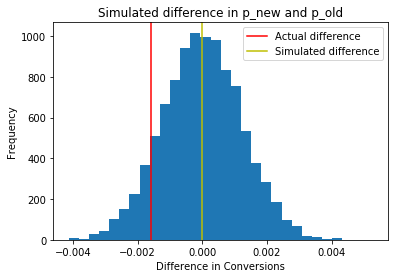

<Figure size 1280x1280 with 0 Axes>

In [44]:
plt.hist(p_diffs, bins=30)
plt.title('Simulated difference in p_new and p_old')
plt.xlabel('Difference in Conversions')
plt.ylabel('Frequency')
plt.axvline(x=(p_diff_actual), color='r', label='Actual difference')
plt.axvline(x=p_diff_mean, color='y', label='Simulated difference')
plt.legend()
plt.figure(figsize=(20,20), dpi=64)

From the histogram, it can be seen that, the difference in probability of the simulated version lies at 0, which is correct as per the assumption made (p_new = p_old) and the plot is normal.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
greater  = np.where(p_diffs > (p_diff_actual))
greater[0].size / p_diffs.size

0.9004

Actual difference = 0

Simulated difference = -7.4 x e-6 ~= 0

Proportion of simulated difference (**p_diffs**) greater than actual difference is : **90.04**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

In order to reject the Null Hypothesis, the proportion of difference between the actual and simulation should be less than 5%, but more than 90% of the population in simulated results lie above the actual difference, which conforms to the **acceptance** of **Null Hypothesis**

Thus, we fail to reject Null Hypothesis, and the new page might be performing worse than the old page if not equal

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [175]:
n_new

145310

In [46]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').query('converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page"').query('converted == 1').count()[0] 

/home/gowty/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [47]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new] )
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

On a two tail test, Z Score past -1.96 or 1.96, will be significant. But, here it's within the critical level, and hence we fail to reject the Null Hypothesis

Source : The Link given in the above cell

But, Since what we have performed in the above cell is a two tail test, while what we have manually done is a one tail test, the values, don't match. But, a p value from two tail test can be converted to one tail test as below

In [48]:
1 - p_value/2

0.9050583127590245

As we can see, after conversion, the above value corresponds to what has been calculated manually.

Source : https://stats.idre.ucla.edu/other/mult-pkg/faq/pvalue-htm/

Also, the p-value is greater than 0.05, again which leads to the same conclusion, that is, the failure to reject Null Hypothesis. So, the new page isn't performing any better than the old page

In [50]:
# Performing a one tail test using statsmodel

z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative='smaller' )
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

From the last two cells, it can be seen that, the conversion from two sided p value to one sided is correct, and the simulated value from statsmodel corresponds to the value found manually

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since, the the variable to be predicted is discrete, we will be using **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [179]:
# Create a new df copy of df2

df3 = df2.copy()

In [181]:
# Adding Intercept
df3['intercept'] = 1

In [182]:
df3[['new', 'old']] = pd.get_dummies(df3['landing_page'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new,old
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


In [184]:
# Adding ab_page column

df3[['inv', 'ab_page']] = pd.get_dummies(df3['group'])
df3.tail()

#The inv column is unnecessary and can be dropped

,user_id,timestamp,group,landing_page,converted,intercept,new,old,ab_page,inv
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0,1
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0,1
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0,1
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0,1
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [ ]:
## The ab_page column is 0 if control, 1 if treatment, which actually means it is treatment column encoded.

In [192]:
# No need to add ab_page, as new_page will always have treatment, we'll end up having singular matrix

lm = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [193]:
# summary() function failed to work. Used summary2 instead

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-26 21:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

The p Value associated with ab_page is **0.1899**

While in Hypothesis testing from part II, the Null Hypothesis was **p_new - p_old <= 0**, but in Logistic Regression, the Null Hypothesis is, **There's no relation between the Variables (ab_page ie) control and treatment)** That is, **p_new != p_old**. Thus while part II was one sided test, Regression model is a two sided test and this is the reason for difference in the **p-values**

After converting **p-value** from two sided to one sided as below

1 - (0.1899/2), we can see that, this value is same as what we got from statsmodel value

Source : http://www.biostathandbook.com/multiplelogistic.html

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

The P - Value for ab_page is not less than 0.05, and hence we fail to reject the null hypothesis. Thus, there's no relation between variables *ab_page* and *conversion*. The relationship between them isn't strong as suggested by p values. Thus, it'll be a better idea to add more variables

As far disadvantages, having too many features, or higher order terms will lead to the overfitting of the model, and the model will fail to generalize.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [198]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page,inv
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [199]:
### Checking the number of dummy variables needed
df_new.groupby('country').count()

,timestamp,group,landing_page,converted,intercept,new,old,ab_page,inv
country,,,,,,,,,
CA,14499,14499,14499,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619,203619,203619,203619


In [200]:
# Creating dummy variables

df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new,old,ab_page,inv,CA,UK,US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [203]:
# Fitting a model for Country with US as baseline

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
res = lm.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-27 00:30 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

The p values of both CA and UK are both higher than 0.05, and thus they are not significant. And, we fail to reject the Null Hypothesis, that there's no relationship between *conversion rate* and *country*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [204]:
### Fit Your Linear Model And Obtain the Results
# Ab_page is used, which means, new_page and treatment is the baseline
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
lm.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-27 00:37 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

Adding *landing page* hasn't improved the fit of the model as seen from the p values of ab_page,  CA and UK.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.